In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

%config InlineBackend.figure_format='svg'


import numpy as np
from matplotlib import pyplot as plt

from morphing_birds import Hawk3D, plot, interactive_plot, plot_multiple, animate, animate_compare, plot_plotly, create_dash_app

np.set_printoptions(suppress=True, precision=3)



# Load the Average Hawk Shape


IntSlider(value=60, description='azimuth', max=90, min=-90, step=5)

IntSlider(value=20, description='elevation', max=90, min=-15, step=5)

Output()

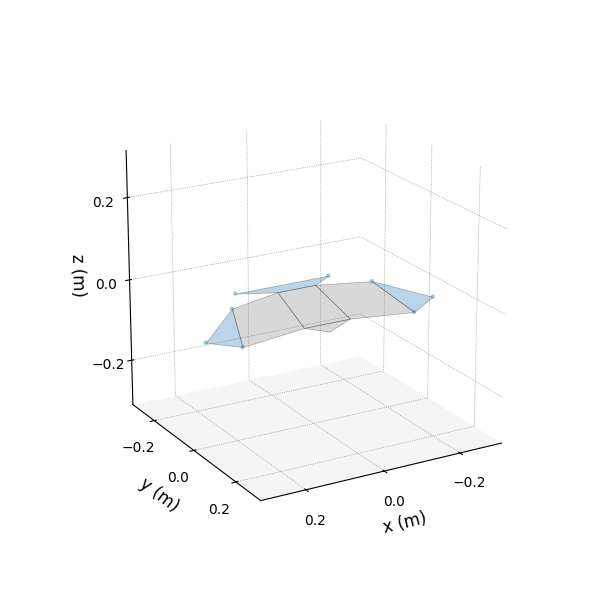

In [3]:
hawk3d = Hawk3D("../data/mean_hawk_shape.csv")

interactive_plot(hawk3d)

plt.show()

In [20]:
plot_plotly(hawk3d)



natural_size: 0.74417901587035
base_scale: 0.1
view_radius: 0.30000000000000004


In [17]:
# Assume your function is accessible from here, either by import or direct definition
app = create_dash_app()
app.run_server(mode='inline')  # 'inline' will embed it within the Jupyter notebook

## Alter the Body Pitch

In [ ]:
hawk3d.restore_keypoints_to_average()
hawk3d.reset_transformation()
hawk3d.transform_keypoints(bodypitch=90, yaw=0)
interactive_plot(hawk3d, az=90, el=0)

## Animate Random Motion

In [ ]:
%matplotlib widget
# Make a set of keypoints by adding some random noise to the original keypoints
hawk3d.reset_transformation()
hawk3d.restore_keypoints_to_average()
fake_keypoints = np.random.normal(0, 0.01, (100,8,3)) + hawk3d.markers


# Animate the random motion
animate(hawk3d, fake_keypoints, rotation_type="static")

# Can also try dynamic rotation
# animate(hawk3d, fake_keypoints, rotation_type="dynamic")


In [ ]:
hawk3d.restore_keypoints_to_average()
hawk3d.reset_transformation()

interactive_plot(hawk3d,az=90, el=0)

## Animate two on top of each other

In [ ]:
hawk3d.reset_transformation()
fake_keypoints = np.random.normal(0, 0.01, (100,8,3)) + hawk3d.markers
hawk3d.reset_transformation()
compare_fake_keypoints = np.random.normal(0, 0.01, (100,8,3)) + hawk3d.markers


# Animate the random motion
animate_compare(hawk3d, [fake_keypoints, compare_fake_keypoints], rotation_type="static")

In [ ]:
plt.close("all")

In [ ]:
# from IPython.display import HTML

hawk3d = Hawk3D("../data/mean_hawk_shape.csv")
hawk3d.restore_keypoints_to_average()
hawk3d.reset_transformation()
colour_list = ["red", "blue", "green", "orange", "purple", "cyan", "magenta", "yellow", "black", "grey", "pink"]
cropped_image = plot_multiple(hawk3d,fake_keypoints, 9, cut_off=0, el=10, rot=-30, colour_list=colour_list)
display(cropped_image)